In [39]:
import numpy as np
from hamiltonian import *
from reconstruct_lcu import *
from continuers import *
from qsearch_bundle_circuit import *
import pickle

In [40]:
def get_exact_wavefunction(Bzlist,J,Bx,N,pbc):
    # Bzlist = np.linspace(Bzmin,Bzmax,100)
    eval_stor = np.zeros([len(Bzlist),2**N])
    
    evecs_stor = []
    for iBz, Bz in enumerate(Bzlist):
        ham = XY_hamiltonian(J=J,Bz=Bz,Bx=Bx,N=N,pbc=pbc)
        w, v = np.linalg.eigh(ham)
        eval_stor[iBz,:] = np.linalg.eigvalsh(ham)
        evecs_stor.append(v)
    
    return  eval_stor,evecs_stor


In [45]:
def fidelity(Bzmax=4):
    J = -1
    Bx = 0.1
    N = 2
    pbc = False

    fig, ax, Bzlist, eval_stor = show_XY_spectrum(N=N, Bzmin=0, Bzmax=Bzmax, Bx=Bx, J=J, pbc=pbc)
  
    Bzlist_training = [0.5, 1.3]
   
    training_paramlist = [[J, Bx, Bz, N, pbc] for Bz in Bzlist_training]
    # _qc for passing parameters to the quantum circuit, because I prefer dictionaries than lists
    training_paramlist_qc = [{"J": J, "Bx": Bx, "Bz": Bz, "N": N, "pbc": pbc} for Bz in Bzlist_training]

    if 'ax' in locals():
        for b in Bzlist_training:
            ax.axvline(b)

    Bzlist_target = np.linspace(0.0,Bzmax,50)

    target_paramlist = [[J, Bx, Bz, N, pbc] for Bz in Bzlist_target]
    # target_paramlist_qc = [{"J": J, "Bx": Bx, "Bz": Bz, "N": N, "pbc": pbc} for Bz in Bzlist_target]
    #################### INPUT parameters over ######################################

    # Object that knows how to deal with the various operations needed
    vectorspace = vector_methods(XY_hamiltonian)


    EVcontinuer = vector_continuer(vectorspace,
                                   XY_hamiltonian,
                                   Mag_op,
                                   training_paramlist,
                                   target_paramlist,
                                   N)

    EVcontinuer.get_base_eigenvectors()
   
    EVcontinuer.get_target_eigenvectors(ortho=False)   
    # LCUcoeffslist = EVcontinuer.LCU_coeffs_list
    # base_vecs = EVcontinuer.base_vecs
    eval_stor,evecs_stor = get_exact_wavefunction(Bzlist=Bzlist_target,J=J,Bx=Bx,N=N,pbc=pbc)
    full_vecs = EVcontinuer.target_full_evecs
    fidelity_stor = np.zeros([len(Bzlist_target),len(Bzlist_training)])
    if 'ax' in locals():
        for ip in range(len(training_paramlist)):
            ax.plot(Bzlist_target, np.real(EVcontinuer.target_evals[:, ip]), 'o', color="b")
    fignamepng = "plots/testing/spectrumforfidelity2site.png"
    fig.savefig(fignamepng,bbox_inches="tight")
    print("eigen vectors")        
    for i in range(len(Bzlist_target)):
        v = evecs_stor[i]
        for j in range(len(Bzlist_training)):
            # print(v[:,j])
            # print(full_vecs[len(Bzlist_training)*i+j])
            # print(np.vdot(v[:,j],full_vecs[len(Bzlist_training)*i+j]))
            fidelity_stor[i,j] = (np.abs(np.vdot(v[:,j],full_vecs[len(Bzlist_training)*i+j])))**2
            # print(fidelity_stor[i,j],"\n")
        # LCU_coeffs = LCUcoeffslist[i]
        # ECvec = np.zeros_like(v[:,0])
        # for j in range(len(LCUcoeffslist[i])):            
        #     ECvec += LCU_coeffs[j]*base_vecs[j]
        # print(ECvec)
        # print(np.vdot(ECvec,v[:,0]))
    fig,ax = plt.subplots()
    for ip in range(len(training_paramlist)):
        ax.plot(Bzlist_target,fidelity_stor[:,ip],marker="o",label = str(ip))
        ax.legend()
    fignamepng = "plots/testing/fidelity2site.png"
    fig.savefig(fignamepng,bbox_inches="tight")

[-1, 0.1, 0.5, 2, False]
Adding vector for parameter set [-1, 0.1, 0.5, 2, False]
[-1, 0.1, 1.3, 2, False]
Adding vector for parameter set [-1, 0.1, 1.3, 2, False]

eigen vectors


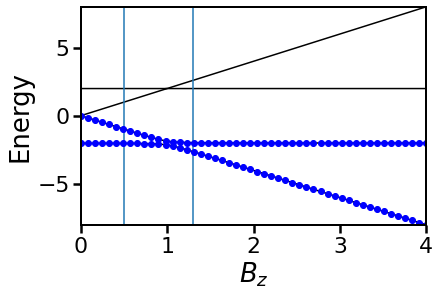

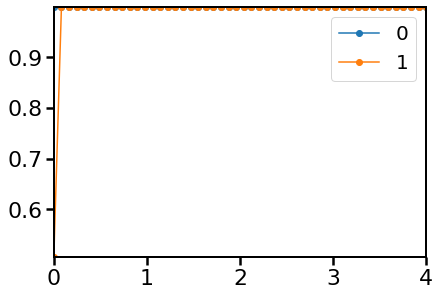

In [46]:
fidelity()